<a href="https://colab.research.google.com/github/bobs24/Data-Science-Learning-Path/blob/Learning/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from mpl_toolkits import mplot3d

In [ ]:
#pandas to read csv file
df = pd.read_csv('Data_Negara_HELP.csv',index_col='Negara')
df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [ ]:
#make sure the rows and columns amount is the same as the original (it means no null)
df.shape

(167, 9)

In [ ]:
#data information types and non-null 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kematian_anak     167 non-null    float64
 1   Ekspor            167 non-null    float64
 2   Kesehatan         167 non-null    float64
 3   Impor             167 non-null    float64
 4   Pendapatan        167 non-null    int64  
 5   Inflasi           167 non-null    float64
 6   Harapan_hidup     167 non-null    float64
 7   Jumlah_fertiliti  167 non-null    float64
 8   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [ ]:
#the higher 'GDPperkapita' means welfare to that country
df.sort_values(by=['GDPperkapita'],ascending=False)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800
Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
...,...,...,...,...,...,...,...,...,...
Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334


In [ ]:
#to give us statistical information
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
q1 = df['GDPperkapita'].quantile(0.25)
q3 = df['GDPperkapita'].quantile(0.75)
q4 = statistics.stdev(df['GDPperkapita'])
q5 = statistics.median(df['GDPperkapita'])
iqr = q3-q1

#1.5 is a fix number to make the gaussian curve symmetrical
lower_bound = q1 - (iqr*1.5)
upper_bound = q3 + (iqr*1.5)

#in order to find the most needed country, I still need the lower_bound (country <= upper_bound)
df1 = df.loc[df['GDPperkapita'] <= upper_bound]
df1 

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [ ]:
Mean_GDPperkapita = statistics.mean(df1['GDPperkapita'])
df2 = df1.loc[df1['GDPperkapita'] <= Mean_GDPperkapita]

#based on data from WHO, life expectancy of the people on 2018 is 72.5 years
df3 = df2.loc[df2['Harapan_hidup'] <= 72.5]
df3.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,70.035616,30.793137,6.077260,45.711862,4032.780822,10.515753,63.112329,4.164384,1800.328767
std,40.588974,17.180806,2.610484,19.584160,3377.537311,13.243520,7.136447,1.452379,1513.820453
min,5.500000,0.109000,1.970000,0.065900,609.000000,0.505000,32.100000,1.270000,231.000000
25%,36.900000,18.700000,4.530000,30.900000,1610.000000,3.800000,58.700000,2.880000,648.000000
50%,62.700000,25.800000,5.300000,43.200000,2790.000000,7.140000,64.600000,4.340000,1220.000000
75%,93.600000,41.200000,6.850000,57.500000,5410.000000,13.800000,68.800000,5.270000,2830.000000
max,208.000000,85.100000,14.200000,101.000000,16200.000000,104.000000,72.500000,7.490000,6230.000000


In [ ]:
#To see the correlation for every variables
#range -1 to 1 (closer to -1 means that there is negative correlation, closer to 1 means that there is positive correlation)
df3.corr()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Kematian_anak,1.000000,-0.272850,0.067666,-0.198491,-0.554589,0.121013,-0.805935,0.685085,-0.561281
Ekspor,-0.272850,1.000000,-0.199087,0.398249,0.485941,0.030625,0.158998,-0.272550,0.479651
Kesehatan,0.067666,-0.199087,1.000000,0.416306,-0.230282,-0.047304,-0.212976,0.115437,-0.135550
Impor,-0.198491,0.398249,0.416306,1.000000,-0.006442,-0.247123,-0.044394,-0.236362,0.135007
Pendapatan,-0.554589,0.485941,-0.230282,-0.006442,1.000000,0.122124,0.503637,-0.592045,0.886833
Inflasi,0.121013,0.030625,-0.047304,-0.247123,0.122124,1.000000,0.023117,0.138187,0.073313
Harapan_hidup,-0.805935,0.158998,-0.212976,-0.044394,0.503637,0.023117,1.000000,-0.512023,0.477427
Jumlah_fertiliti,0.685085,-0.272550,0.115437,-0.236362,-0.592045,0.138187,-0.512023,1.000000,-0.495689
GDPperkapita,-0.561281,0.479651,-0.135550,0.135007,0.886833,0.073313,0.477427,-0.495689,1.000000


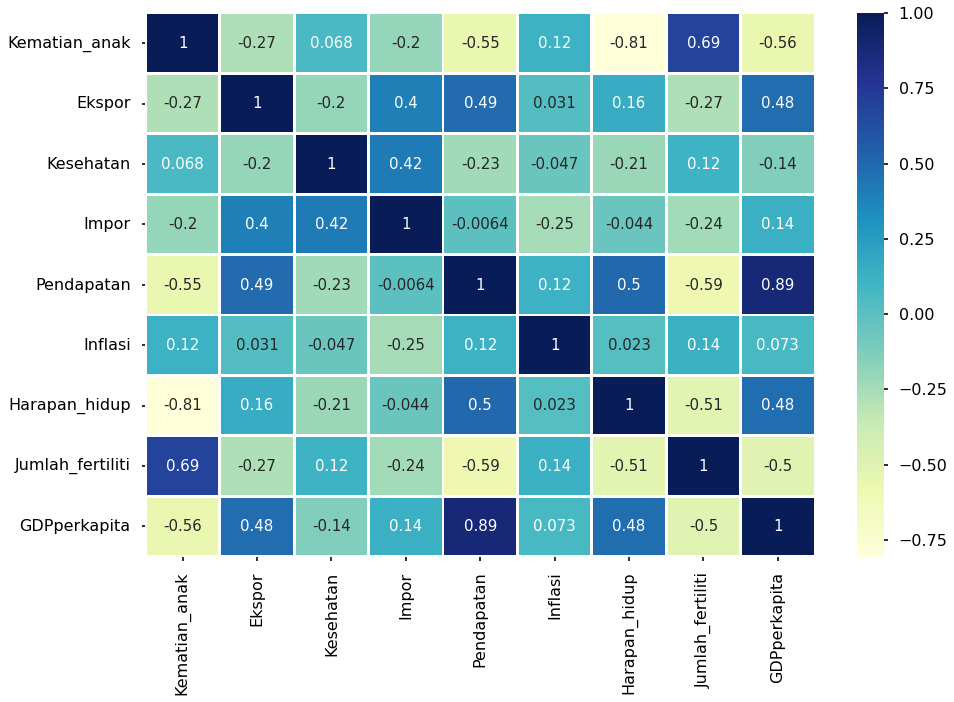

In [ ]:
#plotting correlation heatmap
plt.figure(figsize=(15,10),frameon=True)
dataplot = sns.heatmap(df3.corr(), cmap="YlGnBu", annot=True, linewidths = 2, annot_kws={'size': 15})
  
#displaying heatmap
#range -1 to 1 (closer to -1 means that there is negative correlation, closer to 1 means that there is positive correlation)
plt.show()

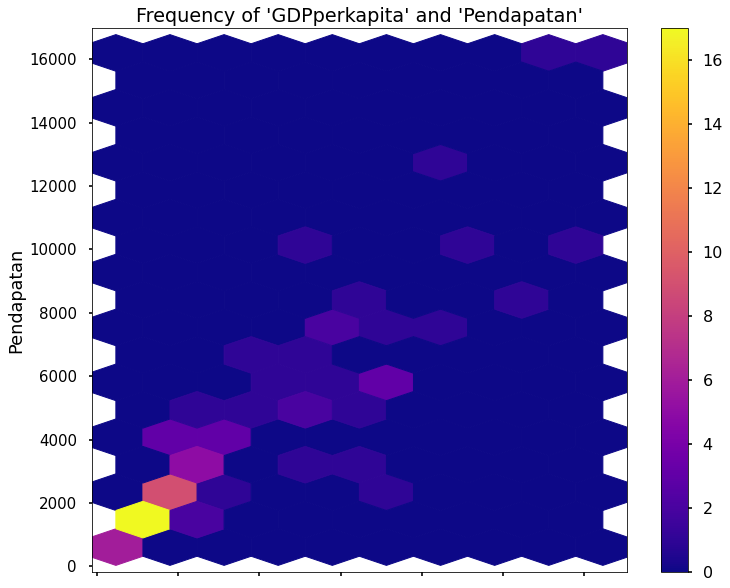

In [ ]:
#the result of 'Pendapatan' and 'GDPperkapita' based on frequency occurence
Hexbin1 = pd.DataFrame(data=df3, columns=["GDPperkapita", "Pendapatan"]) 
Hexbin1.plot.hexbin(x='GDPperkapita', y='Pendapatan', gridsize=(9,9), title="Frequency of 'GDPperkapita' and 'Pendapatan'",
                    figsize=(12,10),cmap = 'plasma', fontsize = 15)

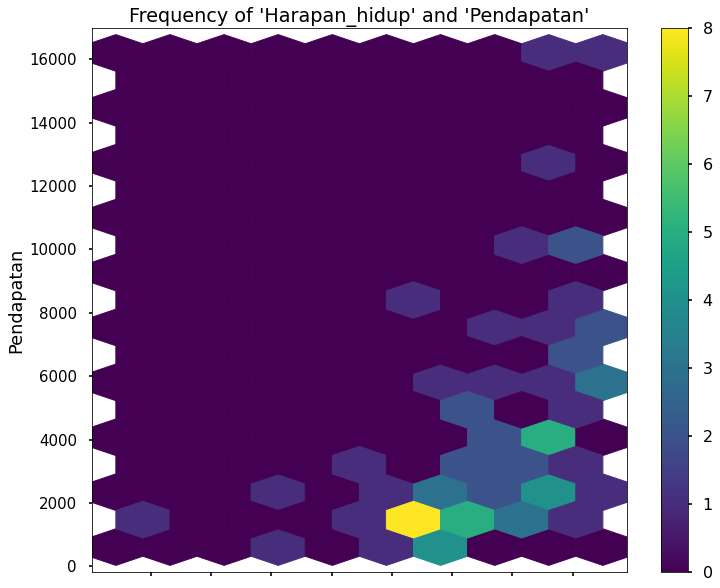

In [ ]:
#the result of 'Harapan_hidup' and 'Pendapatan' based on frequency occurence
Hexbin1 = pd.DataFrame(data=df3, columns=["Harapan_hidup", "Pendapatan"])
Hexbin1.plot.hexbin(x='Harapan_hidup', y='Pendapatan', gridsize=(9,9), title="Frequency of 'Harapan_hidup' and 'Pendapatan'",
                    figsize=(12,10),cmap = 'viridis', fontsize = 15)

<Figure size 864x576 with 0 Axes>

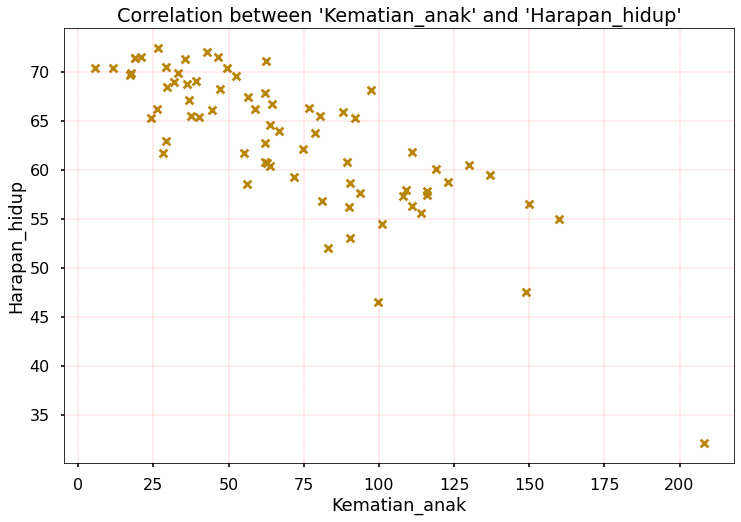

In [ ]:
#the correlation between 'Kematian_anak' and 'Harapan_hidup' 
plt.figure(figsize=(12,8))
Scatter1 = pd.DataFrame(data=df3, columns=["Kematian_anak", "Harapan_hidup"])
Scatter1.plot.scatter(x='Kematian_anak', y='Harapan_hidup', title="Correlation between 'Kematian_anak' and 'Harapan_hidup'",
                      figsize=(12,8), marker = 'x', s = 60, c = 'darkgoldenrod')
plt.grid(color = 'r', linestyle='--', linewidth=0.2)
plt.show()

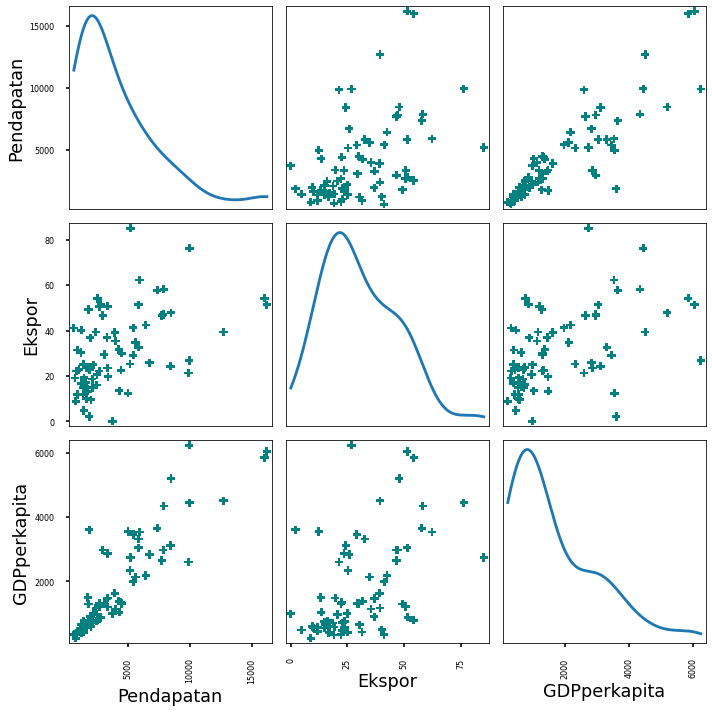

In [ ]:
#Relationship between 'GDPperkapita' and 'Ekspor' low positive correlation
#Relationship between 'GDPperkapita' and 'Pendapatan' positive correlation
#Relationship between 'Pendapatan' and 'Ekspor' low positive correlation
plt.style.use('seaborn-poster')
pd.plotting.scatter_matrix(df3.loc[:,['Pendapatan','Ekspor','GDPperkapita']],alpha = 1, 
                           diagonal = 'kde', figsize=(10,10),marker ='P', s=70, c='teal')
plt.tight_layout()
plt.show()

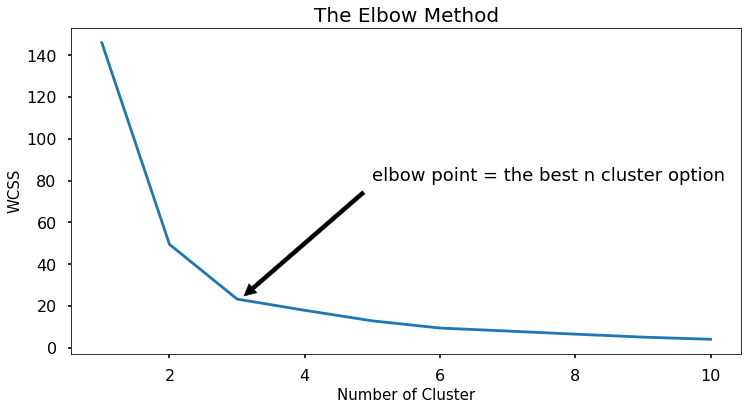

In [ ]:
df4 = df3[['GDPperkapita','Pendapatan']]

#feature scaling
sc = StandardScaler()
df_std = sc.fit_transform(df4.astype(float))
new_df = pd.DataFrame(data = df_std,columns = ['GDPperkapita','Pendapatan'])

#Elbow method, determine the n cluster
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init="k-means++",random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)
#plt.figure(figsize=(8,4))
fig, elbow = plt.subplots(figsize=(12,6))
elbow.plot(range(1,11),wcss)
elbow.annotate('elbow point = the best n cluster option', xy=(3, 22), xytext=(5, 80), 
               arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 18)
elbow.set_xlabel('Number of Cluster', fontsize = 15)
elbow.set_ylabel('WCSS', fontsize = 15)
elbow.set_title('The Elbow Method',size = 20)
plt.show()

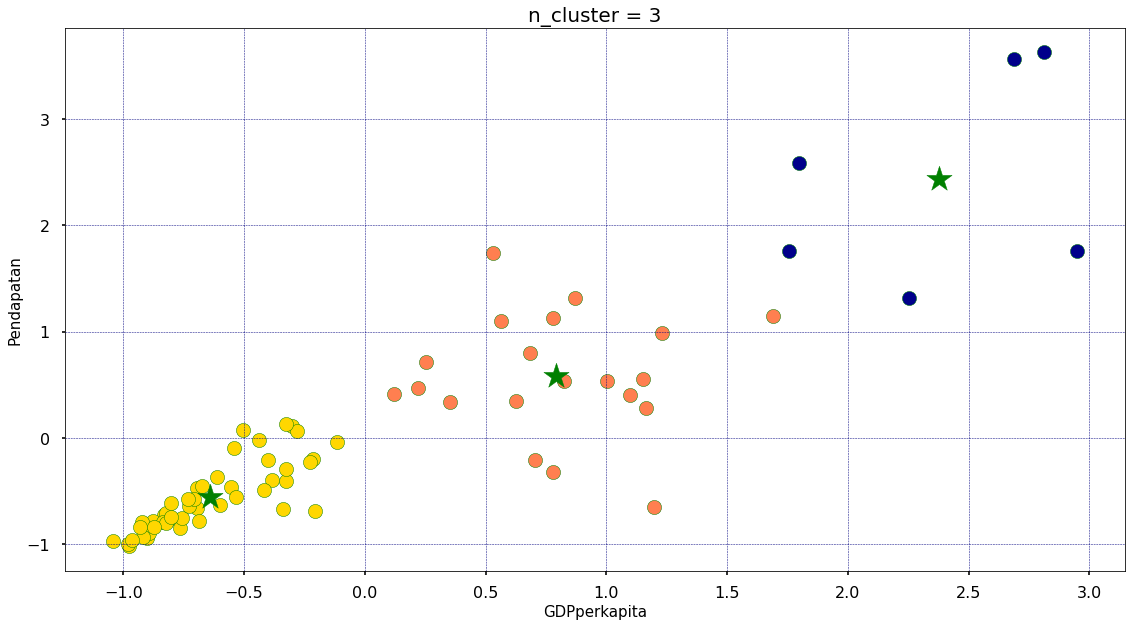

In [ ]:
#K-Means Clustering (n = 3 karena elbow method)
kmeans1 = KMeans(n_clusters=3, random_state = 42).fit(df_std)
labels1 = kmeans1.labels_
new_df['labels_kmeans']=labels1

plt.figure(figsize=(19,10)) #besarin figure
plt.scatter(new_df.GDPperkapita[new_df.labels_kmeans == 0],new_df['Pendapatan'][new_df.labels_kmeans == 0], 
            c ='coral', s=200, edgecolor ='green', linestyle='-')
plt.scatter(new_df.GDPperkapita[new_df.labels_kmeans == 1],new_df['Pendapatan'][new_df.labels_kmeans == 1], 
            c ='gold', s=200, edgecolor ='green', linestyle='-')
plt.scatter(new_df.GDPperkapita[new_df.labels_kmeans == 2],new_df['Pendapatan'][new_df.labels_kmeans == 2], 
            c ='darkblue', s=200, edgecolor ='green', linestyle='-')

centers=kmeans1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='green',s=700, marker = '*')
plt.grid(color = 'navy', linestyle='--', linewidth=0.5)
plt.xlabel('GDPperkapita', fontsize = 15)
plt.ylabel('Pendapatan', fontsize = 15)
plt.title('n_cluster = 3',size = 20)
plt.show()

**Priority 1 -> Cluster 1 (GDPperkapita < 1980 & Pendapatan < 5000): **

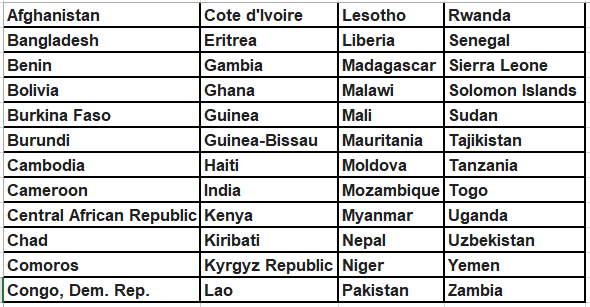


**Priority 2 -> Cluster 2 (GDPperkapita < 4340 & Pendapatan < 10000): **

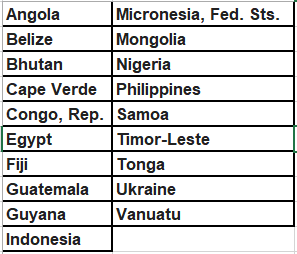


**Priority 3 -> Cluster 3 (GDPperkapita < means & Pendapatan <= 16200): **

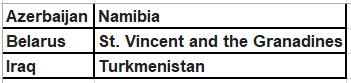

In [ ]:
#to measure distance between every point to every centroid
print(silhouette_score(new_df,labels=labels1))

0.6959152889891083
